<a href="https://colab.research.google.com/github/DanielKorenDataScience/ClassificationProject/blob/main/Classification_Project_Shufersal_Detergents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Project - DETERGENTS

for Shufersal on-line orders, for replacing of missing products, will predict the replacement success!

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
p = print
d = display

# Get Data

## Raw Data

To run the raw section, one must load Sweets_ver2.csv to local google drive and change the next line to True

In [4]:
id = ''  # name of result file
prefix = 'Shufersal_Detergents'

RAW = True
DIFF = True

In [5]:
def get_raw(fname, subdir=''):
  data_url = 'https://raw.githubusercontent.com/DanielKorenDataScience/ClassificationProject/main/' + subdir + fname
  resp = requests.get(data_url)
  text = resp.text
  
  if len(text) > 100:
    with open(fname, 'w') as fh:
      fh.write(text)

In [6]:
if RAW:
  fname = 'Detergents.csv'
  get_raw(fname)    
  df1 = pd.read_csv(fname, encoding='utf-8', nrows=1)
  df2 = pd.read_csv(fname, encoding='utf-8', usecols=[i for i in range(82) if not i in[0,8,10,12,14,16,18,20,24,26,27,48,50,52,54,56,58,62,64,65]])
  d(df1)

,OrderNumbert,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,TransactionDate,DepartmentCode,DepartmentName,CategoryCode,CategoryName,GroupCode,GroupName,SubGroupCode,SubGroupName,CompoundID,CompoundIDDesc,ParentProductNumber,ProductDescription,BrandIndDesc,BrandName,VendorNumber,VendorName,UnitOfMeasure,ItemsPerPackageWH,DescriptionTavit,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,...,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,DepartmentNameSusb,CategoryCodeSubs,CategoryNameSubs,GroupCodeSubs,GroupNameSubs,SubGroupCodeSubs,SubGroupNameSubs,CompoundIDSubs,CompoundIDDescSubs,ProductNumberSubs,ProductDescriptionSubs,BrandIndDescSuss,BrandNameSubs,VendorNumberSubs,VendorNameSubs,UnitOfMeasureSubs,ItemsPerPackageWHSubs,DescriptionTavitSubs,PriceSubs,NetSaleNoVatPrdSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSusb,CorrelateItemStatusCode
0,16801,1,ראשון לציון,202101,202103,202111,4,HolidayPeriod,17/03/2021,13,13-טיפוח הבית,22,דטרגנטים,488,מוצרים לאסלה,3,"ניקוי אסלות צורתי 750 מ""ל",36049,"דאק ג'ל מקציף אקונומיקה 750 מ""ל",8.690780e+12,דאק ג'ל אקונומיקה ים750מ,טואלט דאק,לא מותג פרטי,914133,"דנשר )1963( בע""מ",0.75,12,"750 מ""ל",9,2,45,835.7,33592.29,0.9,16,2.9,PromoSusbDiffPromo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13,13-טיפוח הבית,22,דטרגנטים,488,מוצרים לאסלה,3,"ניקוי אסלות צורתי 750 מ""ל",36049,"דאק ג'ל מקציף אקונומיקה 750 מ""ל",8.690780e+12,דאק ג'ל אקונומ.לבנדר750מ,טואלט דאק,לא מותג פרטי,914133,"דנשר )1963( בע""מ",0.75,12,"750 מ""ל",9,37535.36,0.9,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
def diff_list(li1, li2):
  p(len(li1), len(li2))
  return [i for i in li1 + li2 if i not in li1 or i not in li2]

### Cans dataset identical features as Sweets - the diff list returns empty list

In [8]:
if RAW:
  fname = 'Sweets.csv'
  get_raw(fname)    
  df_sweet = pd.read_csv(fname, encoding='utf-8', nrows=1)
  d(diff_list(list(df1.columns), list(df_sweet.columns)))

82 82


[]

In [9]:
if RAW:
  df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OrderNumbert                1 non-null      int64  
 1   HouseHoldID                 1 non-null      int64  
 2   LocationCityName            1 non-null      object 
 3   QuarterNumber               1 non-null      int64  
 4   MonthNumber                 1 non-null      int64  
 5   WeekNumber                  1 non-null      int64  
 6   DayNumberInWeek             1 non-null      int64  
 7   PeriodHoliday               1 non-null      object 
 8   TransactionDate             1 non-null      object 
 9   DepartmentCode              1 non-null      int64  
 10  DepartmentName              1 non-null      object 
 11  CategoryCode                1 non-null      int64  
 12  CategoryName                1 non-null      object 
 13  GroupCode                   1 non-null 

Eliminating unwanted columns - mostly descriptive columns

In [10]:
if RAW:
  d(diff_list(list(df1.columns), list(df2.columns)))

82 62


['OrderNumbert',
 'TransactionDate',
 'DepartmentName',
 'CategoryName',
 'GroupName',
 'SubGroupName',
 'CompoundIDDesc',
 'ProductDescription',
 'VendorName',
 'ItemsPerPackageWH',
 'DescriptionTavit',
 'DepartmentNameSusb',
 'CategoryNameSubs',
 'GroupNameSubs',
 'SubGroupNameSubs',
 'CompoundIDDescSubs',
 'ProductDescriptionSubs',
 'VendorNameSubs',
 'ItemsPerPackageWHSubs',
 'DescriptionTavitSubs']

In [11]:
if RAW:
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61327 entries, 0 to 61326
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HouseHoldID                 61327 non-null  int64  
 1   LocationCityName            61318 non-null  object 
 2   QuarterNumber               61327 non-null  int64  
 3   MonthNumber                 61327 non-null  int64  
 4   WeekNumber                  61327 non-null  int64  
 5   DayNumberInWeek             61327 non-null  int64  
 6   PeriodHoliday               61327 non-null  object 
 7   DepartmentCode              61327 non-null  int64  
 8   CategoryCode                61327 non-null  int64  
 9   GroupCode                   61327 non-null  int64  
 10  SubGroupCode                61327 non-null  int64  
 11  CompoundID                  61327 non-null  float64
 12  ParentProductNumber         61327 non-null  float64
 13  BrandIndDesc                613

None

In [12]:
# Fix Typo mistake
if RAW: 
  df2.rename(columns={'OrderNumbert': 'OrderNumber','BrandIndDescSuss': 'BrandIndDescSubs', 'ProductNumberSubs': 'ParentProductNumberSubs', 
                    'NetSaleNoVatPrdSubs': 'NetSaleNoVatPrdLast3MonthsSubs', 'CafiotSucarSusb': 'CafiotSucarSubs'}, inplace=True)

Eliminating nulls

In [13]:
# Fill na
if RAW:
  df2.fillna({'QuantSale': 1, 'QuantSaleSubs': 1}, inplace=True)
  df2.fillna(0, inplace=True)
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61327 entries, 0 to 61326
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HouseHoldID                     61327 non-null  int64  
 1   LocationCityName                61327 non-null  object 
 2   QuarterNumber                   61327 non-null  int64  
 3   MonthNumber                     61327 non-null  int64  
 4   WeekNumber                      61327 non-null  int64  
 5   DayNumberInWeek                 61327 non-null  int64  
 6   PeriodHoliday                   61327 non-null  object 
 7   DepartmentCode                  61327 non-null  int64  
 8   CategoryCode                    61327 non-null  int64  
 9   GroupCode                       61327 non-null  int64  
 10  SubGroupCode                    61327 non-null  int64  
 11  CompoundID                      61327 non-null  float64
 12  ParentProductNumber             

None

In [14]:
if RAW:
  df2.to_csv(prefix + '.csv', index = False)
  p(df2.shape)

(61327, 62)


In [15]:
if RAW:
  df = pd.read_csv(prefix + '.csv', index_col=False)
  p(df.shape)

(61327, 62)


## Encoding categories

In [16]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

if RAW:
  enc.fit(['PromoSusbDiffPromo', 'PromoSusbSamePromo', 'noPromo'])
  p(df.isPromo.value_counts())
  p()
  df.isPromo = enc.transform(df.isPromo)
  p(df.isPromo.value_counts())

PromoSusbDiffPromo    33836
noPromo               25139
PromoSusbSamePromo     2352
Name: isPromo, dtype: int64

0    33836
2    25139
1     2352
Name: isPromo, dtype: int64


In [17]:
if RAW:
  for col in ['LocationCityName', 'PeriodHoliday', 'BrandIndDesc', 'BrandName', 'BrandIndDescSubs', 'BrandNameSubs']:
    p(col)
    p(pd.DataFrame(df[col].value_counts()).index)
    df[col] = enc.fit_transform(df[col])
    p(pd.DataFrame(df[col].value_counts()).index)

LocationCityName
Index(['ראשון לציון', 'תל אביב', 'רחובות', 'כפר סבא', 'ירושלים', 'פתח תקוה',
       'חיפה', 'רמת גן', 'אילת', 'נס ציונה', 'חולון', 'רעננה', 'נתניה',
       'עפולה', 'הוד השרון', 'רמת השרון', 'מודיעין', 'מזכרת בתיה', 'גבעתיים',
       'ראש העין', 'קרית מוצקין', 'כרמיאל', 'יהוד', 'קרית עקרון', 'באר יעקב',
       'אשקלון', 'בת ים', 'הרצליה', 'שוהם', 'חדרה', 'יבנה', 'מעלה אדומים',
       'קצרין', 'רמת אביב א', 'קרית ביאליק', 'אשדוד', 'חצור-הגלילית',
       'מגדל העמק', 'חריש', 'רמלה', 'בני ברק', 'צור-יגאל', 'קרית שמונה', 'ערד',
       'קרית אתא', 'זכרון יעקב', 'טירת הכרמל', 'תל מונד', 'פרדסיה',
       'משמר השרון', 'עמק חפר', 'קרית גת', 'ירוחם', 'נהריה', 'בית שאן',
       'גבעת אולגה', 'כפר תבור', 'בנימינה', 'באר שבע', 'אריאל', 'גדרה',
       'באר טוביה', 'אור עקיבא', 'קרית חיים', 'צפת', 'טבריה', 'נשר', 'אופקים',
       'מפרץ חיפה', 'צור משה', 'מבשרת ציון', 'פרדס חנה', 'בית-שמש', 'בת חפר',
       'גבעת שמואל', 'כרכור', 'שדרות', 'מעלות', 'גבעת עדה', 'שילת', '0',
       'כפר

## Combine 'GroupCode' and 'SubGroupCode' into one column

In [18]:
if RAW:
  d(df.head(2))
  df.SubGroupCode = df.GroupCode * 10 + df.SubGroupCode
  df.SubGroupCodeSubs = df.GroupCodeSubs * 10 + df.SubGroupCodeSubs
#  df.drop(['SubGroupCode', 'SubGroupCodeSubs'], axis=1, inplace=True)
  d(df.head(2))

,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,1,88,202101,202103,202111,4,0,13,22,488,3,3.604900e+04,8.690780e+12,19,0,914133,0.75,9.0,2,45,835.70,33592.29,0.9,16,2.9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,488,3,3.604900e+04,8.690780e+12,23,0,914133,0.750,9.0,37535.36,0.9,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,88,202101,202102,202105,4,1,13,22,475,2,-5.900630e+12,5.900630e+12,46,0,913719,0.05,39.9,1,49,972.98,279566.92,0.4,16,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,475,2,-4.607110e+12,4.607110e+12,52,0,913719,0.025,29.6,1754.32,1.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,1,88,202101,202103,202111,4,0,13,22,488,4883,3.604900e+04,8.690780e+12,19,0,914133,0.75,9.0,2,45,835.70,33592.29,0.9,16,2.9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,488,4883,3.604900e+04,8.690780e+12,23,0,914133,0.750,9.0,37535.36,0.9,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,88,202101,202102,202105,4,1,13,22,475,4752,-5.900630e+12,5.900630e+12,46,0,913719,0.05,39.9,1,49,972.98,279566.92,0.4,16,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,475,4752,-4.607110e+12,4.607110e+12,52,0,913719,0.025,29.6,1754.32,1.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Use Dummies

Minimal improvement - FalseNegative (0,0) improved from 1338 to 1328

In [19]:
## Converting the categories column (isPromo) to dummies column 
if RAW:
  p(df.shape)
  df = pd.get_dummies(df, columns=['isPromo', 'PeriodHoliday'])
  p(df.shape)

(61327, 62)
(61327, 65)


In [20]:
if RAW:
  df_t = df.copy()

## Calc diff vector

In [21]:
if RAW:
  p(df.columns)

Index(['HouseHoldID', 'LocationCityName', 'QuarterNumber', 'MonthNumber',
       'WeekNumber', 'DayNumberInWeek', 'DepartmentCode', 'CategoryCode',
       'GroupCode', 'SubGroupCode', 'CompoundID', 'ParentProductNumber',
       'BrandIndDesc', 'BrandName', 'VendorNumber', 'UnitOfMeasure', 'Price',
       'Quantity', 'cntPrdAll', 'NetSaleAmountAll',
       'NetSaleNoVatPrdLast3Months', 'QuantSale', 'cntMonths',
       'DiscountPerUnit', 'Energy', 'Pachmema', 'Natran', 'Helbon', 'Shuman',
       'ShumanRavuy', 'ShumanTrans', 'Colastrol', 'SivimTzunatim',
       'CafiotSucar', 'DepartmentCodeSubs', 'CategoryCodeSubs',
       'GroupCodeSubs', 'SubGroupCodeSubs', 'CompoundIDSubs',
       'ParentProductNumberSubs', 'BrandIndDescSubs', 'BrandNameSubs',
       'VendorNumberSubs', 'UnitOfMeasureSubs', 'PriceSubs',
       'NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs',
       'DiscountPerUnitSubs', 'EnergySubs', 'PachmemaSubs', 'NatranSubs',
       'HelbonSubs', 'ShumanSubs',

In [22]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'QuantSale', 'cntMonths', 'DiscountPerUnit']:
    df[col + 'Diff'] = df[col] - df[col + 'Subs']

In [23]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
    df[col + 'Diff'] = (df[col + 'Diff'] != 0)    # tested both ==0 and !=0 (the result is 1 for one and 0 for the other - no change in the model results)
    df[col + 'Diff'] = enc.fit_transform(df[col + 'Diff'])

In [24]:
if RAW and DIFF:
  df.to_csv(prefix+ '_with_diff.csv', index = False)

In [25]:
if RAW and DIFF:
  df = pd.read_csv(prefix + '_with_diff.csv', index_col=False)
  p(df.shape)

(61327, 88)


# Get ready Data

In [26]:
if RAW:
  p(df.shape)
  d(df.head())

(61327, 88)


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,...,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,isPromo_0,isPromo_1,isPromo_2,PeriodHoliday_0,PeriodHoliday_1,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff,QuantSaleDiff,cntMonthsDiff,DiscountPerUnitDiff
0,1,88,202101,202103,202111,4,13,22,488,4883,3.604900e+04,8.690780e+12,19,0,914133,0.75,9.0,2,45,835.70,33592.29,0.9,16,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,488,4883,3.604900e+04,8.690780e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0,0,0,0,0,1,0,0.000,0.0,-3943.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.90
1,1,88,202101,202102,202105,4,13,22,475,4752,-5.900630e+12,5.900630e+12,46,0,913719,0.05,39.9,1,49,972.98,279566.92,0.4,16,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,475,4752,-4.607110e+12,4.607110e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,1,1,1,0,0.025,10.3,277812.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6,0,5.00
2,1,88,202101,202103,202111,4,13,22,485,4853,-2.869210e+05,2.869210e+05,34,0,910215,0.75,16.9,1,45,835.70,30188.00,0.9,16,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,485,4853,-5.430602e+06,5.430602e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,1,1,1,0,0.000,-1.0,-89003.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0,0.00
3,2,88,202101,202101,202103,2,13,22,477,4772,-5.425714e+06,5.425714e+06,34,0,910215,0.60,26.9,1,34,1085.25,16511.42,1.0,16,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,477,4772,-2.871020e+05,2.871020e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,0,0,1,1,1,0,0.060,7.0,-15070.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0,0.00
4,2,88,202101,202101,202101,5,13,22,486,4861,2.041500e+04,7.290010e+12,27,0,910215,1.00,15.9,1,21,391.50,175023.59,0.6,16,1.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,486,4861,2.041500e+04,7.290010e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.000,1.9,85951.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,0,1.88


In [27]:
#if not RAW: - so not to use df_ratio
df = pd.read_csv(prefix + '_with_diff.csv', encoding='ISO-8859-8')
p(df.shape)
d(df.head())

(61327, 88)


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,...,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,isPromo_0,isPromo_1,isPromo_2,PeriodHoliday_0,PeriodHoliday_1,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff,QuantSaleDiff,cntMonthsDiff,DiscountPerUnitDiff
0,1,88,202101,202103,202111,4,13,22,488,4883,3.604900e+04,8.690780e+12,19,0,914133,0.75,9.0,2,45,835.70,33592.29,0.9,16,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,488,4883,3.604900e+04,8.690780e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0,0,0,0,0,1,0,0.000,0.0,-3943.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.90
1,1,88,202101,202102,202105,4,13,22,475,4752,-5.900630e+12,5.900630e+12,46,0,913719,0.05,39.9,1,49,972.98,279566.92,0.4,16,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,475,4752,-4.607110e+12,4.607110e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,1,1,1,0,0.025,10.3,277812.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6,0,5.00
2,1,88,202101,202103,202111,4,13,22,485,4853,-2.869210e+05,2.869210e+05,34,0,910215,0.75,16.9,1,45,835.70,30188.00,0.9,16,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,485,4853,-5.430602e+06,5.430602e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,1,1,1,0,0.000,-1.0,-89003.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0,0.00
3,2,88,202101,202101,202103,2,13,22,477,4772,-5.425714e+06,5.425714e+06,34,0,910215,0.60,26.9,1,34,1085.25,16511.42,1.0,16,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,477,4772,-2.871020e+05,2.871020e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,0,0,1,1,1,0,0.060,7.0,-15070.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0,0.00
4,2,88,202101,202101,202101,5,13,22,486,4861,2.041500e+04,7.290010e+12,27,0,910215,1.00,15.9,1,21,391.50,175023.59,0.6,16,1.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,22,486,4861,2.041500e+04,7.290010e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.000,1.9,85951.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,0,1.88


# Models

## Models - remove ingredients - no change in results

In [28]:
REMOVE_ING = False
if REMOVE_ING:
  id = 'remove ingredients'
  try:
    del X_train, X_test, y_train, y_test
  except:
    pass
  
  cols = ['CorrelateItemStatusCode']
  for col in ['Energy', 'Pachmema', 'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar']:
      cols.append(col)
      cols.append(col + 'Subs')
      cols.append(col + 'Diff')

  X = df.drop(cols, axis=1)
  y = df.CorrelateItemStatusCode.astype(int)

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
  p(df.shape)
  p(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37912, 88)

(26538, 57) (11374, 57) (26538,) (11374,)

## Models - remove all features execpt of prices

In [29]:
ONLY_PRICE = False
if ONLY_PRICE:
  id = 'only_prices'
  try:
    del X_train, X_test, y_train, y_test
  except:
    pass
  
  X = df[['Price', 'PriceSubs', 'PriceDiff']]
  y = df.CorrelateItemStatusCode.astype(int)

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
  p(df.shape)
  p(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37912, 88)

(26538, 3) (11374, 3) (26538,) (11374,)

## Models - Train on sweets, test on detergents

In [30]:
SWEETS = False
if SWEETS:
  get_raw('Shufersal_with_diff.csv')
  df = pd.read_csv('Shufersal_with_diff.csv', index_col=False)
  p(df.shape)
  d(df.head(1))

In [31]:
if SWEETS:
  df_sweets = pd.read_csv('Shufersal_with_diff.csv', index_col=False)
  X_train = df_sweets.drop('CorrelateItemStatusCode', axis=1)
  y_train = df_sweets.CorrelateItemStatusCode.astype(int)

  p(df_sweets.shape, X_train.shape, y_train.shape)
  d(df_sweets.head())

In [32]:
if SWEETS:
  df_cans = pd.read_csv(prefix + '_with_diff.csv', index_col=False)
  X_test = df_cans.drop('CorrelateItemStatusCode', axis=1)
  y_test = df_cans.CorrelateItemStatusCode.astype(int)

  p(df_cans.shape, X_test.shape, y_test.shape)
  d(df_cans.head())

  id = 'train_sweet_pred_detergents'


## Models - process_model code

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import math

pd.set_option("precision", 2)
df_result = pd.DataFrame()

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X = df.drop('CorrelateItemStatusCode', axis=1)
y = df.CorrelateItemStatusCode.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [35]:
def report(clf, X, y, note, test, data_type='Test'):
  global df_result
  name = type(clf).__name__ + ': ' + data_type
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  index = [(name, clf.classes_[0]), (name, clf.classes_[1])]
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  cm.reset_index(drop=True, inplace=True)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  rep['precision_avg'] = rep.precision['macro avg']
  rep['recall_avg'] = rep.recall['macro avg']
  rep['f1-score_avg'] = rep['f1-score']['macro avg']
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0, inplace=True)
  rep.reset_index(drop=True, inplace=True)
  df = cm.join(rep)
  df['name'] = name
  df['note'] = note
  df.loc[1, 'note'] = ''
  if test:  # do not add to database
    d(df)
  else:    
    df.reset_index(inplace=True)
    df_result.reset_index(inplace=True)
    df_result = df_result.append(df, ignore_index=True)
    df_result.set_index(['name', 'index'], inplace=True)
  return df_result

In [43]:
#ROC and AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def get_roc_and_auc(model,X_test,y_test):
    ns_probs = [0 for _ in range(len(y_test))]
#    lr_probs = clf_voting.predict_proba(X_test)[:,1]
    lr_probs = model.predict_proba(X_test)[:,1]
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('\nNo Skill: ROC AUC=%.3f' % (ns_auc))
    print('model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    fig = plt.figure(figsize=(5,5))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='model')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(type(model).__name__ )
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [37]:
def showFeatureImportance(model, X, threshold):
  if type(model).__name__ == 'LogisticRegression':  # no features importance data
    w0 = model.intercept_[0]
    w = model.coef_[0]
    fx_imp = pd.Series(w, index=X.columns)
  else:
    fx_imp = pd.Series(model.feature_importances_, index=X.columns)
  fx_imp /= fx_imp.sum()
  fx_imp = fx_imp.sort_values()
  fx_imp = fx_imp[fx_imp > threshold]
  fig = plt.figure(figsize=(5,5))
  plt.xlim(0, 1)
  fx_imp.plot(kind='barh', title=type(model).__name__ )

In [38]:
def process_model(model, X, y, X_test, y_test, plot=False, threshold=0, note='', test=False):
  p('running: ', type(model).__name__, X.shape)
  model.fit(X, y)
  report(model, X, y, note, test, 'Train')
  report(model, X_test, y_test, note, test)
  if plot:
    showFeatureImportance(model, X, threshold)
    get_roc_and_auc(model,X_test,y_test)
  return df_result 

In [39]:
from sklearn.linear_model import LogisticRegression, BayesianRidge, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


## Models - Run process_model

running:  RandomForestClassifier (42928, 87)
No Skill: ROC AUC=0.500
model: ROC AUC=0.905


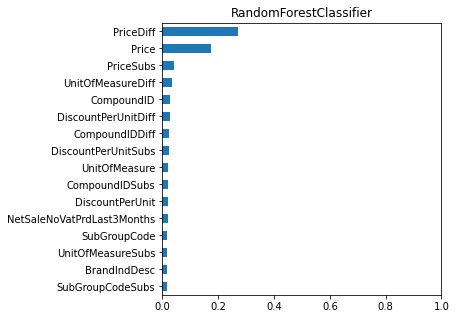

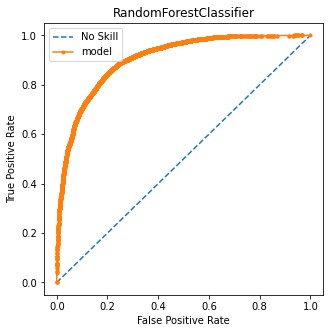

0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      8067.0   4841.0       0.86    0.62   
                              1      1276.0  28744.0       0.86    0.96   
RandomForestClassifier: Test  0      3243.0   2248.0       0.83    0.59   
                              1       644.0  12264.0       0.85    0.95   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.73      0.86  12908.0   
                              1          0.90      0.86  30020.0   
RandomForestClassifier: Test  0          0.69      0.84   5491.0   
                              1          0.89      0.84  12908.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.86        0.79          0.81   
                              1               0.86        0.79          0.81   
RandomForestClassifier: Test  0               0.84        0.77          0.79   
                              1               0.84        0.77          0.79   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                         
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1

In [44]:
df_result = pd.DataFrame()

clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=1234)
process_model(clf_RF, X_train, y_train, X_test, y_test, plot=True, threshold=0.015, note="n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=1234")

d(df_result)

fname = prefix + f'_result_{id}.csv'
df_result.to_csv(fname, index = True)

## Models - compare results

1. Diff
2. Diff with remove ingredients columns
6. OnlyPrices - Diff with only 3 features( Price, PriceSubs, PriceDiff)
7. Train on sweets, predict on detergents

In [41]:
def read_results(id='', disp=True, full=False):
  fname = prefix + f'_result_{id}.csv'
  p(fname)
  try:
    df = pd.read_csv(fname)
  except:
    try:
      get_raw(fname, 'Results/')
      df = pd.read_csv(fname)
    except:
      p('No data')
      return
  df.set_index(['name', 'index'], inplace=True)
  if not full:
    df = df.loc[['RandomForestClassifier: Train', 'RandomForestClassifier: Test']]#.copy()
  if disp:
    pd.set_option("max_column", 120)
    d(df)
  return df

In [42]:
p(id)
read_results()
read_results('remove ingredients')
read_results('only_prices')
read_results('train_sweet_pred_detergents')
p()


Shufersal_Detergents_result_.csv


0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      8067.0   4841.0       0.86    0.62   
                              1      1276.0  28744.0       0.86    0.96   
RandomForestClassifier: Test  0      3243.0   2248.0       0.83    0.59   
                              1       644.0  12264.0       0.85    0.95   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.73      0.86  12908.0   
                              1          0.90      0.86  30020.0   
RandomForestClassifier: Test  0          0.69      0.84   5491.0   
                              1          0.89      0.84  12908.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.86        0.79          0.81   
                              1               0.86        0.79          0.81   
RandomForestClassifier: Test  0               0.84        0.77          0.79   
                              1               0.84        0.77          0.79   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN

Shufersal_Detergents_result_remove ingredients.csv


0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      8322.0   4586.0       0.86    0.64   
                              1      1315.0  28705.0       0.86    0.96   
RandomForestClassifier: Test  0      3331.0   2160.0       0.83    0.61   
                              1       674.0  12234.0       0.85    0.95   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.74      0.86  12908.0   
                              1          0.91      0.86  30020.0   
RandomForestClassifier: Test  0          0.70      0.85   5491.0   
                              1          0.90      0.85  12908.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.86        0.80          0.82   
                              1               0.86        0.80          0.82   
RandomForestClassifier: Test  0               0.84        0.78          0.80   
                              1               0.84        0.78          0.80   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN

Shufersal_Detergents_result_only_prices.csv


0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      6940.0   5968.0       0.78    0.54   
                              1      1948.0  28072.0       0.82    0.94   
RandomForestClassifier: Test  0      2925.0   2566.0       0.78    0.53   
                              1       849.0  12059.0       0.82    0.93   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.64      0.82  12908.0   
                              1          0.88      0.82  30020.0   
RandomForestClassifier: Test  0          0.63      0.81   5491.0   
                              1          0.88      0.81  12908.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0                0.8        0.74          0.76   
                              1                0.8        0.74          0.76   
RandomForestClassifier: Test  0                0.8        0.73          0.75   
                              1                0.8        0.73          0.75   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN

Shufersal_Detergents_result_train_sweet_pred_detergents.csv


0        1  precision  recall  \
name                          index                                        
RandomForestClassifier: Train 0      12719.0   5349.0       0.84    0.70   
                              1       2412.0  33980.0       0.86    0.93   
RandomForestClassifier: Test  0      10759.0   7640.0       0.56    0.58   
                              1       8394.0  34534.0       0.82    0.80   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.77      0.86  18068.0   
                              1          0.90      0.86  36392.0   
RandomForestClassifier: Test  0          0.57      0.74  18399.0   
                              1          0.81      0.74  42928.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.85        0.82          0.83   
                              1               0.85        0.82          0.83   
RandomForestClassifier: Test  0               0.69        0.69          0.69   
                              1               0.69        0.69          0.69   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN